# Genetic Programming with Python

by Emil Vassev

November 1-2, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Evolutionary Algorithms (EAs)

* adapt the Darwinian principles of automated problem solving
* a R&D category of Evolutionary Computation, which is a subfield of AI
* constitute a collection of methods that originally have been developed to solve combinatorial optimization problems


**Evolution**
* a random process of **selection**, **reproduction** and **mutation**
* driven by evolutionary pressure - survival of the fittest
* search is conducted with **generations of populations**

**Solutions**
* solutions may reach a local optimum from which it will be difficult to achieve any significant improvements
* fitness of individuals may depend on the other individuals in the population (e.g., coevolution)
* good solutions are somehow constrained by the environment (e.g., convergence)
* populations evolving in different niches can independently develop different (but similar) solutions to the same problem 

**Digital Evolution**

A dynamic mechanism that includes a population of entities (potential solutions) where some form of replication, variation and selection occurs on those entities:
* **Replication**: new entities are formed, either creating a completely new generation of the population or altering specific individuals within the same population (steady-state)
* **Variation**: makes the population diverse - two forms:
 * **recombination** (called crossover) - creates new entities by combining parts of other entities
 * **mutation** - injects randomness into the population by stochastically changing specific features of the entities
* **Selection**: based on Darwin’s natural selection, or *Survival Of The Fittest*, where selected entities that show the most promise are carried forward, with variation on the selection being used to create the children of the next generation

<div>
 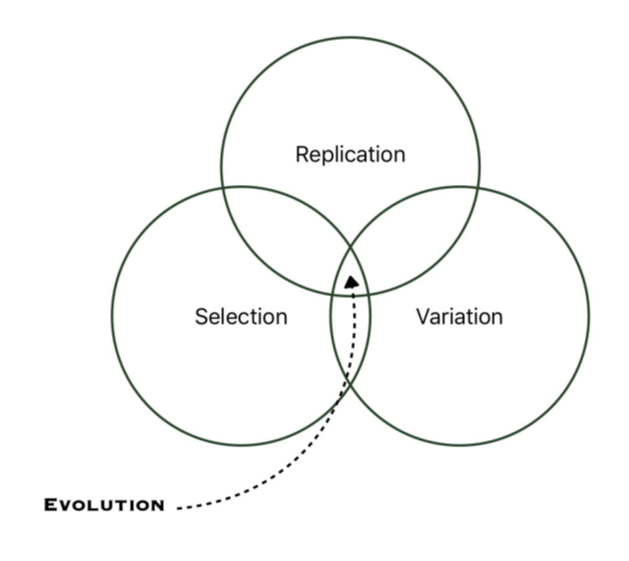
</div
    
In digital evolution, a population of entities goes through **generational changes**:
* each change starts with a selection from the previous generation (initial population $Po$)
* each entity is evaluated against a known specific goal (criterion), i.e., the fitness is established and used as input to the selection algorithm
* once a selection is made, replication (reproduction) occurs with different degrees of variation:
 * the reproduction is a combination of two or more individuals (crossover) and random alteration (mutation)
 * the variation - either by recombination from the parent selection and/or some stochastic mutation
    
<div>
 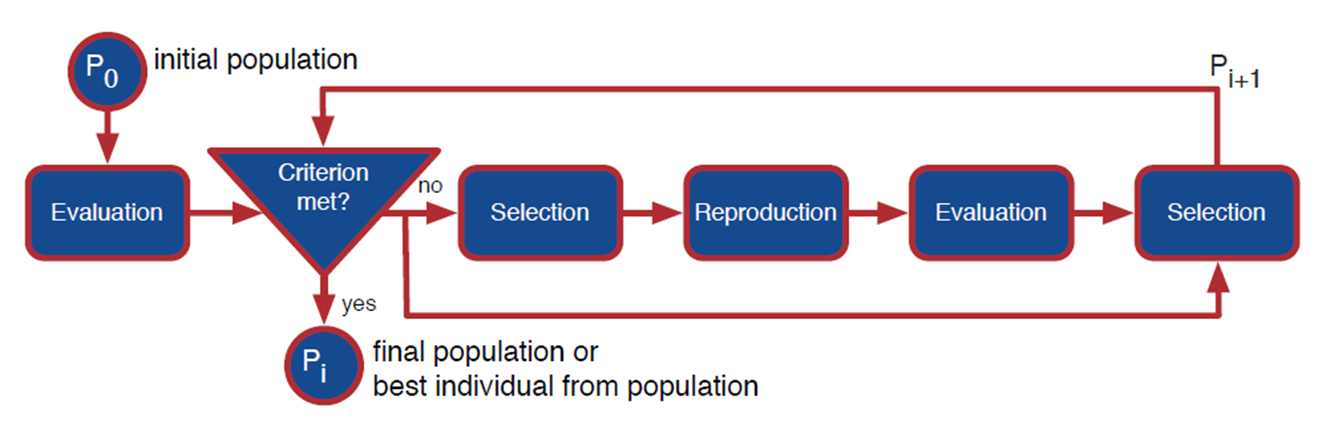
</div

**Applications of EAs**

EAs are applied to problems where traditional stochastic algorithms fail or find it difficult to reach a conclusion - normally due to constraints on resources, high number of dimensions or complex functionality.

EAs can be applied to a variety of problem domains:
* **Variable optimization** - consists of searching a variable space for a ”good” solution, where the number of variables being searched is large. Potentially at a magnitude greater than a traditional programming problem. 
* **New structural design** - consists of creating a completely new solution, for example like a program or a mechanical design. E.g., evolutionary designed NASA antenna.
* **Improvement** - the case where a known working solution is placed into the system and EAs explore potential better versions. This is where a solution already exists and there is a notion that a potential better solution can be discovered.

<span style="color:blue">In this exercise, we deal with a **variable optimization** problem.</span>  

## PyGAD

* PyGAD is an open-source Python library for building genetic algorithms and optimizing machine learning algorithms. It works with Keras and PyTorch.
* PyGAD supports different types of crossover, mutation, and parent selection operators. 
* PyGAD allows different types of problems to be optimized using the genetic algorithm by customizing the fitness function.
* PyGAD offers a range of parameters that allow the user to customize the genetic algorithms for a wide range of applications. 

The PyGAD documentation is available here:
https://pygad.readthedocs.io/en/latest/

PyGAD is available through PyPI (Python Package Index) and it can be installed simply using pip:
```python
pip install pygad
```

**Implementation Steps**
1. Create a fitness function.
2. Prepare the necessary parameters for the pygad.GA class.
3. Create an instance of the pygad.GA class.
4. Run the genetic algorithm via the instance of pygad.GA.

The constructor of the pygad.GA class accepts 19 parameters (ML hyperparameters), where only three are required:
* *num_generations*: number of generations to be generated out of the population
* *num_parents_mating*: number of solutions to be selected as parents
* *fitness_func*: the fitness function that calculates the fitness value for the solutions

The *fitness_func* parameter is what allows the genetic algorithm to be customized for different problems. This parameter accepts a user-defined function that calculates the **fitness value** for a single solution. A user-defined fitness function:
* accepts two parameters: the solution, and its index within the population 
* must return a single number representing the fitness of each solution

Example:

Linear function: $y = a*x1 + b*x2 + c*x3 + d*x4 + e*x5 + f*x6 + g*x7 + h*x8$ 
 * factors: $a, b, c, d, e, f, g, h$
 * inputs for the factors: [2, -3.4, 3.8, 7, -20, -4.7, 5, 17]
 * required output: $y = 56$
 
The fitness function for this problem is: 
```python
factor_inputs = [2,-3.4,3.8,7,-20,-4.7, 5, 17]  # values for factors of the linear function 𝑎,𝑏,𝑐,𝑑,𝑒,𝑓,𝑔,ℎ
y_required = 56  # function output

def fitness_func(solution, solution_idx):
    
    # solution carries values for the variables 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5,𝑥6,𝑥7,𝑥8
    
    # 𝑦=𝑎∗𝑥1+𝑏∗𝑥2+𝑐∗𝑥3+𝑑∗𝑥4+𝑒∗𝑥5+𝑓∗𝑥6+𝑔∗𝑥7+ℎ∗𝑥8
    y = numpy.sum(solution*factor_inputs)
    
    # calculates how close is the result y to the rquired output y_required 
    fitness = 1.0 / numpy.abs(y - y_required)
    
    return fitness
```

## Example:  Fitting a Linear Model

This example is an elaborated versions of the example provided in the PyGAD documentation here:
<a link="https://pygad.readthedocs.io/en/latest/" target="new">PyGAD - Python Genetic Algorithm!</a>

 Linear function: $y = a*x1 + b*x2 + c*x3 + d*x4 + e*x5 + f*x6 + g*x7 + h*x8$ 
 * factors: $a, b, c, d, e, f, g, h$
 * inputs for the factors: [2, -3.4, 3.8, 7, -20, -4.7, 5, 17]
 * required output: $y = 56$
 
What are the values for the 8 parameters to satisfy the equation? 
The genetic algorithm can be used to find the answer.

In [1]:
import numpy
import pygad

print(pygad.__version__)

2.18.1


In [2]:
factor_inputs = [2,-3.4,3.8,7,-20,-4.7, 5, 17]  # values for factors of the linear function 𝑎,𝑏,𝑐,𝑑,𝑒,𝑓,𝑔,ℎ
y_required = 56  # function output

def fitness_func(solution, solution_idx):
    
    # solution carries values for the variables 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5,𝑥6,𝑥7,𝑥8
    
    # 𝑦=𝑎∗𝑥1+𝑏∗𝑥2+𝑐∗𝑥3+𝑑∗𝑥4+𝑒∗𝑥5+𝑓∗𝑥6+𝑔∗𝑥7+ℎ∗𝑥8
    y = numpy.sum(solution*factor_inputs)
    
    # calculates how close is the result y to the rquired output y_required 
    fitness = 1.0 / numpy.abs(y - y_required)
    
    return fitness

Setting up the hyperparameters of pygad.GA

In [3]:
# number of generations to be produced
num_generations = 100

# number of solutions to be selected as parents
num_parents_mating = 20

# number of solutions within the population 
sol_per_pop = 50

# number of genes (variables) in a solution 
num_genes = len(factor_inputs)

# init_range_low - the lower value of the random range from which the gene values in the 
# initial population are selected; the default value is -4
init_range_low = -2

# init_range_high - the upper value of the random range from which the gene values in the 
# initial population are selected; the default value is 4
init_range_high = 5

# percentage of genes to mutate 
mutation_percent_genes = 30

# type of the mutation operation; default value is "random" 
mutation_type = "inversion"

In [4]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       mutation_percent_genes=mutation_percent_genes,
                       mutation_type=mutation_type)

In [5]:
ga_instance.run()

In [6]:
x = ga_instance.best_solution()

In [7]:
print(x)

(array([ 1.01401043, -1.56289989,  3.09034621, -0.74651388, -1.56289989,
       -1.12753111, -1.56289989,  0.78822562]), 429.37188599754205, 0)


In [8]:
x[0]

array([ 1.01401043, -1.56289989,  3.09034621, -0.74651388, -1.56289989,
       -1.12753111, -1.56289989,  0.78822562])

In [9]:
y = 0
for i in range(len(factor_inputs)):
    y += factor_inputs[i]*x[0][i] 

print("Calculated result: " + str(y))
print("Required result: " + str(y_required)) 

Calculated result: 56.002328983411836
Required result: 56


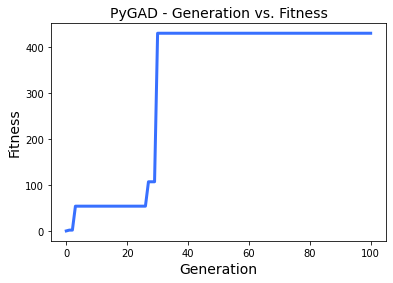

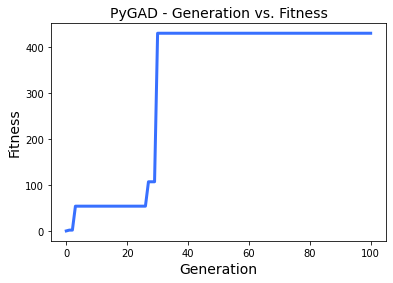

In [10]:
ga_instance.plot_fitness()